# Machine Learning - Danilo de Melo Brito

<a href="https://colab.research.google.com/drive/1UdXAMbiadLcWbRL_Pc2e9OZkOEvVt9UK?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando dependências

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from google.colab import drive
from google.colab import files

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Danilo-Brito/datasets/main/student_performance.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85


## Convertendo String para Float utilizando técnica de codificação de variáveis ​​​​categóricas.

In [ ]:
# Removendo coluna 'Name'
dataset = dataset.drop(columns=['Name'])

# Convertendo coluna 'Gender'
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

# Convertendo coluna 'ParentalSupport'
dataset['ParentalSupport'] = dataset['ParentalSupport'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Validando transformação do dataset
print(dataset.dtypes)
print(dataset.head())

Gender                       int64
AttendanceRate               int64
StudyHoursPerWeek            int64
PreviousGrade                int64
ExtracurricularActivities    int64
ParentalSupport              int64
FinalGrade                   int64
dtype: object
   Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0       0              85                 15             78   
1       1              90                 20             85   
2       0              78                 10             65   
3       0              92                 25             90   
4       1              88                 18             82   

   ExtracurricularActivities  ParentalSupport  FinalGrade  
0                          1                2          80  
1                          2                1          87  
2                          0                0          68  
3                          3                2          92  
4                          2                1          85  


In [ ]:
# Check the distribution of FinalGrade values
value_counts = dataset['FinalGrade'].value_counts()

# Find the grades with only 1 instance
single_instance_grades = value_counts[value_counts == 1].index

# Filter the dataset to show only the rows with these grades
single_instance_rows = dataset[dataset['FinalGrade'].isin(single_instance_grades)]

print(single_instance_rows)

Empty DataFrame
Columns: [Gender, AttendanceRate, StudyHoursPerWeek, PreviousGrade, ExtracurricularActivities, ParentalSupport, FinalGrade]
Index: []


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
# Definindo tamanho do teste e semente aleatória
test_size = 0.20
seed = 7

# Separação em conjunto de treino e teste
array = dataset.values
X = array[:, 0:6]  # Features
Y = array[:, 6]    # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, shuffle=True, random_state=seed, stratify=Y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e Inferência

## Criação e avaliação de modelos: linha base

LR: 0.273333 (0.090567)
KNN: 0.422222 (0.174907)
CART: 0.516667 (0.200755)
NB: 0.352222 (0.204460)
SVM: 0.242222 (0.060000)
Bagging: 0.515556 (0.163918)
RF: 0.495556 (0.197715)
ET: 0.526667 (0.169909)
Ada: 0.175556 (0.061824)
GB: 0.526667 (0.181298)
Voting: 0.337778 (0.115705)


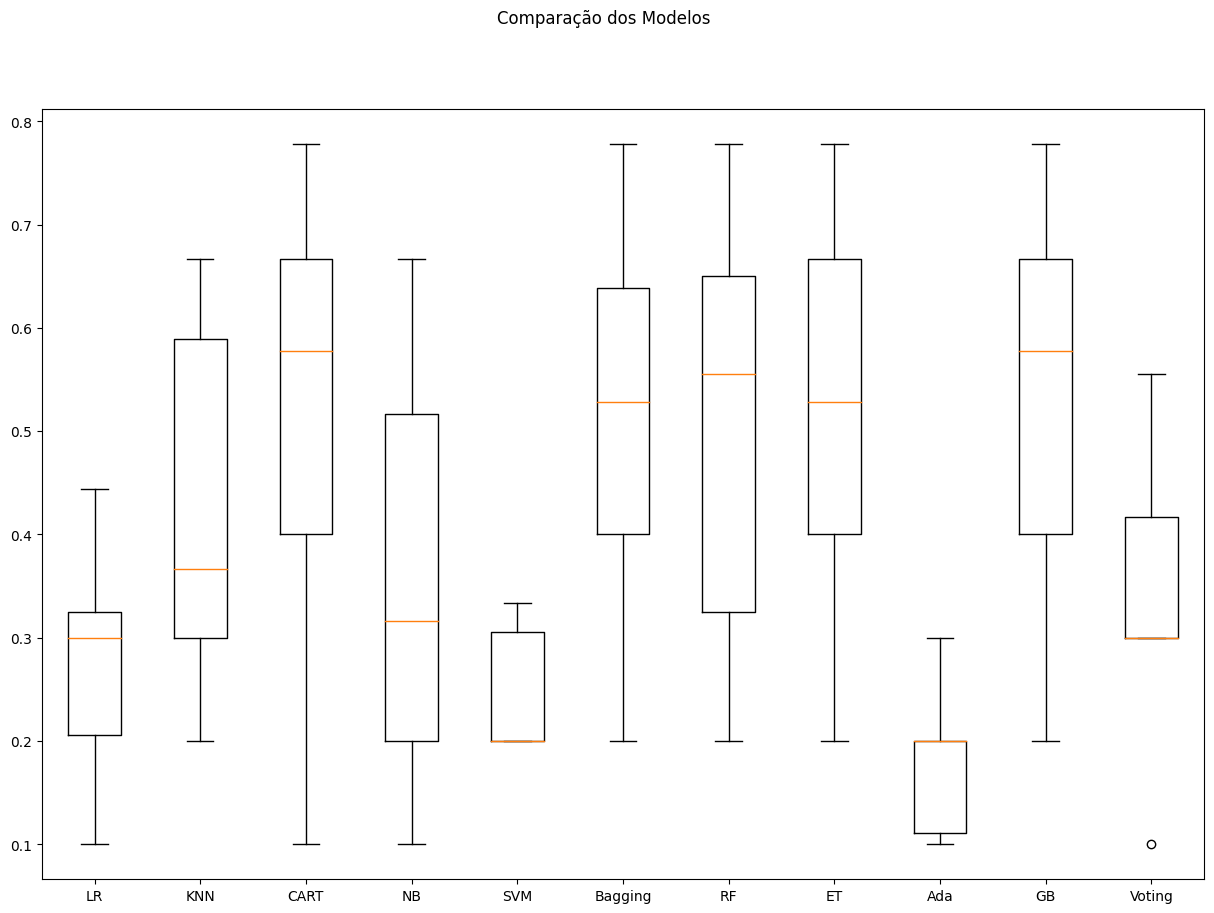

In [ ]:
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.273 (0.091)
KNN-orig: 0.422 (0.175)
CART-orig: 0.537 (0.188)
NB-orig: 0.352 (0.204)
SVM-orig: 0.242 (0.060)
Bag-orig: 0.537 (0.193)
RF-orig: 0.504 (0.176)
ET-orig: 0.497 (0.175)
Ada-orig: 0.176 (0.062)
GB-orig: 0.517 (0.174)
Vot-orig: 0.338 (0.116)
LR-padr: 0.316 (0.114)
KNN-padr: 0.381 (0.172)
CART-padr: 0.516 (0.183)
NB-padr: 0.341 (0.208)
SVM-padr: 0.326 (0.129)
Bag-padr: 0.516 (0.197)
RF-padr: 0.486 (0.173)
ET-padr: 0.526 (0.152)
Ada-padr: 0.176 (0.062)
GB-padr: 0.517 (0.174)
Vot-padr: 0.347 (0.113)
LR-norm: 0.282 (0.051)
KNN-norm: 0.380 (0.165)
CART-norm: 0.517 (0.174)
NB-norm: 0.341 (0.208)
SVM-norm: 0.294 (0.122)
Bag-norm: 0.516 (0.193)
RF-norm: 0.494 (0.195)
ET-norm: 0.526 (0.160)
Ada-norm: 0.176 (0.062)
GB-norm: 0.507 (0.183)
Vot-norm: 0.316 (0.093)


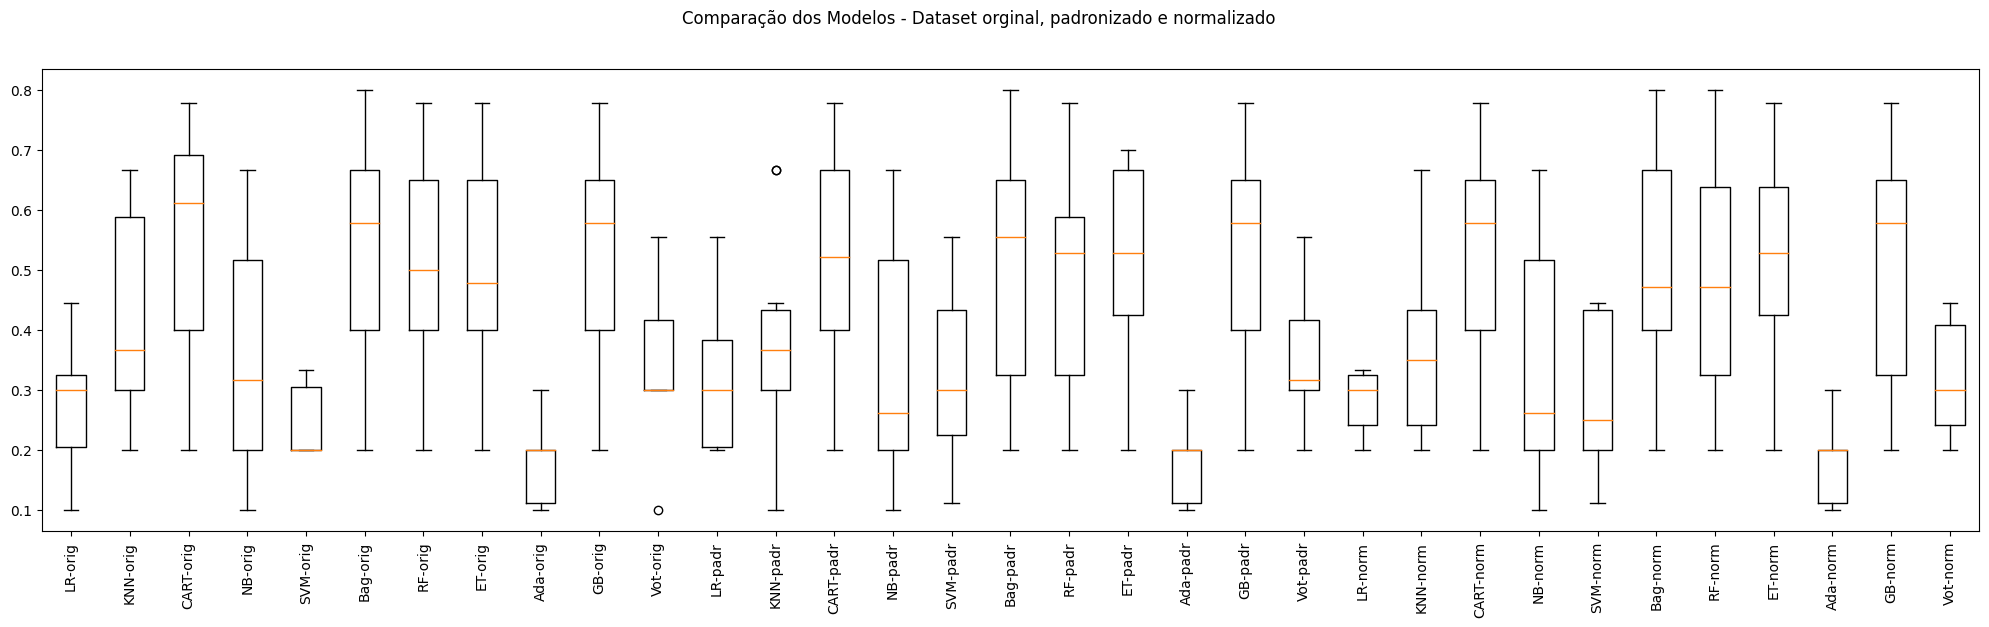

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização dos hiperparâmetros

In [ ]:
np.random.seed(7) # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, Y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: LR-orig - Melhor: 0.302632 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.353158 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.333158 usando {'LR__C': 10, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.468421 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-padr - Melhor: 0.417895 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: KNN-norm - Melhor: 0.418421 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Modelo: CART-orig - Melhor: 0.563158 usando {'CART__max_depth': 30, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.552105 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.521053 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.322632 usando {'NB__var_smoothing': 1e-07}
Modelo: NB-padr - Me

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, Y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.468421 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Sem tratamento de missings: knn-padr - Melhor: 0.417895 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.418421 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, Y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))

0.4583333333333333


In [ ]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.4583333333333333


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, Y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))

0.4583333333333333


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, Y)

RandomForestClassifier(max_depth=10, n_estimators=50)

# Salvando os arquivos

In [ ]:

# Function to save a model
def save_model(model, filename, directory="../models"):
    os.makedirs(directory, exist_ok=True)  # Ensure the directory exists
    filepath = os.path.join(directory, filename)
    with open(filepath, 'wb') as file:
        pickle.dump(model, file)
    return filepath  # Return the file path for downloading

# Function to save a DataFrame to CSV
def save_dataframe_to_csv(df, filename, directory="../data"):
    os.makedirs(directory, exist_ok=True)  # Ensure the directory exists
    filepath = os.path.join(directory, filename)
    df.to_csv(filepath, index=False)
    return filepath  # Return the file path for downloading

# Saving the model
model_filepath = save_model(model, 'rf_best_student_classifier.pkl')
scaler_filepath = save_model(scaler, 'minmax_scaler_student.pkl', directory="../scalers")
pipeline_filepath = save_model(pipeline, 'rf_student_pipeline.pkl', directory="../pipelines")

# Saving X_test and Y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:6])
Y_test_df = pd.DataFrame(Y_test, columns=[dataset.columns[-1]])

X_test_filepath = save_dataframe_to_csv(X_test_df, 'X_test_dataset_student.csv')
Y_test_filepath = save_dataframe_to_csv(Y_test_df, 'y_test_dataset_student.csv')


In [ ]:
files.download(model_filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(scaler_filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(pipeline_filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(X_test_filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(Y_test_filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {
    'geng':[0,0,1],
    'atte':[70,80,95],
    'stud':[5,25,28],
    'prev':[60,90,90],
    'extr':[0,1,3],
    'pare':[0,1,2],
    'finalgrade':[90,92,98]
}

atributos = ['geng', 'atte', 'stud', 'prev', 'extr', 'pare', 'finalgrade']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.0168079  -2.31498959 -2.16936347 -1.89174294 -1.5930297  -1.58022461]
 [-1.0168079  -0.78862283  0.94641889  1.21939209 -0.70389684 -0.26337077]
 [ 0.98346994  1.50092732  1.41378624  1.21939209  1.07436887  1.05348308]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[92 92 94]
